<a id="introduction"></a>
# The Event-Related Potential

1 s EEG data from a single scalp electrode, sampled at 500 Hz during 1,000 trials in two auditory stimuli (A and B). The tone occur at 0.25 s into the trial.

<a id="data-analysis"></a>
## Data Analysis

In [3]:
from scipy.io import loadmat 
from pylab import * 
data = loadmat('matfiles/02_EEG-1.mat')

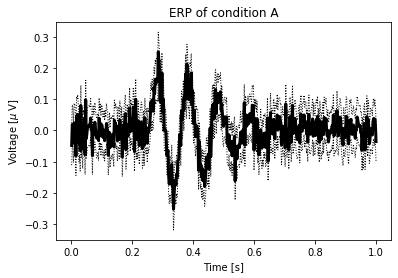

In [4]:
EEGa = data['EEGa']                             
t = data['t'][0]                              
ntrials = len(EEGa)                             

mn = EEGa.mean(0)                               
sd = EEGa.std(0)                                
sdmn = sd / sqrt(ntrials)                       

plot(t, mn, 'k', lw=3)                          
plot(t, mn + 2 * sdmn, 'k:', lw=1)             
plot(t, mn - 2 * sdmn, 'k:', lw=1)              
xlabel('Time [s]')                              
ylabel('Voltage [$\mu$ V]')
title('ERP of condition A')                    
show()                                         

In [5]:
EEGa = data['EEGa']
EEGb = data['EEGb']
t = data['t'][0]

In [8]:
print(data['t'].shape)
print(t.shape)
print(len(data['t']))
print(len(data['t'][0]))

(1, 500)
(500,)
1
500


1000 trials, each consisting of 500 time points.

In [10]:
ntrials, nsamples = EEGa.shape

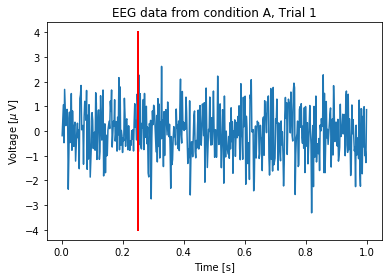

In [6]:
%matplotlib inline
plot(t, EEGa[0])                     
xlabel('Time [s]')                   
ylabel('Voltage [$\mu$ V]')          
title('EEG data from condition A, Trial 1')  

# Add a vertical line to indicate the stimulus time
plot([0.25, 0.25], [-4,4], 'r', lw=2)
savefig('imgs/2-2b')
show()

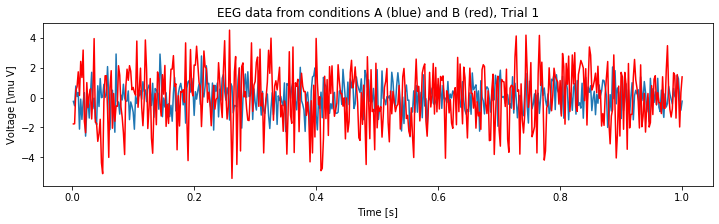

In [7]:
figure(figsize=(12, 3))     
plot(t,EEGa[100])                
plot(t,EEGb[100], 'r')            
xlabel('Time [s]')              
ylabel('Voltage [\mu V]')       
title('EEG data from conditions A (blue) and B (red), Trial 1') 
savefig('imgs/2-3')
show()

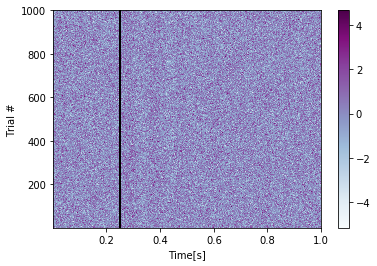

In [8]:
#visualiae the entire EEG matrix as a function of trial number and time

imshow(EEGa,                                   
           cmap='BuPu',                            
           extent=[t[0], t[-1], 1, ntrials],       
           aspect='auto',                          
           origin='lower')                         
xlabel('Time[s]')                              
ylabel('Trial #')
colorbar()                                    
vlines(0.25, 1, 1000, 'k', lw=2)               
savefig('imgs/2-4')
show()

## Event-Related Potential

The ERP is hidden in the EEG signal by other ongoing activity unrelated to the stimulus (e.g., daydreaming, thoughts of dinner, thoughts of homework). Therefore, to tease out the weak evoked effect, **the EEG responses are averaged across trials**. Ideally, EEG activity unrelated to the stimulus will cancel out in the average, while EEG activity evoked by the stimulus will sum constructively.

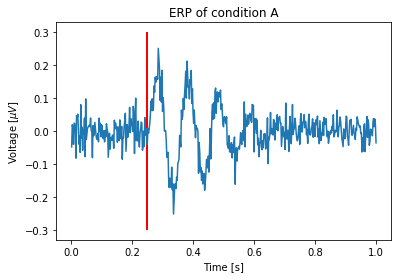

In [16]:
plot(t, EEGa.mean(0))   
vlines(0.25, -0.3, 0.3, 'r', lw=2)   
xlabel('Time [s]')          
ylabel('Voltage [$\mu V$]')
title('ERP of condition A')  
savefig('imgs/2-5')
show()                      

The ERP of condition A shows the mean voltage across trials at each moment in time. Visual inspection suggests that before stimulus presentation (i.e., times 0 s to 0.25 s) the EEG fluctuates around zero. Then, after stimulus presentation, the ERP increases and decreases substantially above and below zero.

<a id="cis-m1"></a>
## Confidence Intervals for the ERP (Method 1: central limit theorem)

To compute the ERP we average the EEG data across many trials. Because of this, we may make use of a powerful theorem in statistics—the <a href="https://en.wikipedia.org/wiki/Central_limit_theorem" rel="external">*central limit theorem*</a> (CLT)—to include approximate confidence bounds in the ERP figure. Briefly, this theorem states that the mean of a sufficiently large number of independent random variables, each with finite mean and variance, will be approximately <a href="https://en.wikipedia.org/wiki/Normal_distribution" rel="external">normally distributed</a>. Remember that the ERP at each moment in time is the sum of EEG activity across trials (then scaled by a constant, the number of trials). Let’s assume that the trials are independent (i.e., one trial does not depend on any other trial). Let’s also assume that the EEG data at each moment in time have finite mean and variance. With those assumptions, we have satisfied the CLT and may therefore conclude that the ERP at each moment in time is approximately normally distributed. The 95% of the values drawn from a normal distribution lie within approximately two standard deviations of the mean.

In [17]:
mn = EEGa.mean(0)  

In [18]:
sd = EEGa.std(0)  # Compute the std across trials

In [19]:
sdmn = sd / sqrt(ntrials)  # Compute the std of the mean

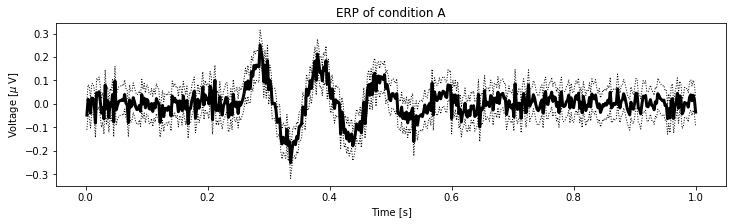

In [20]:
fig, ax = subplots(figsize=(12, 3))    
ax.plot(t, mn, 'k', lw=3)              
ax.plot(t, mn + 2 * sdmn, 'k:', lw=1)  # upper CI
ax.plot(t, mn - 2 * sdmn, 'k:', lw=1)  # lower CI
xlabel('Time [s]')                     
ylabel('Voltage [$\mu$ V]')
title('ERP of condition A')            
fig                                   
show()

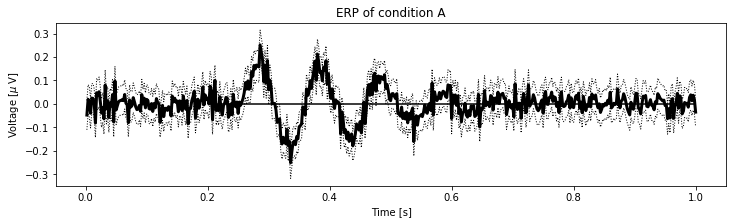

In [21]:
ax.hlines(0, t[100], t[-1])
fig.savefig('imgs/2-7')
fig

<a class="anchor" id="comparing-erps"></a>
## Comparing ERPs

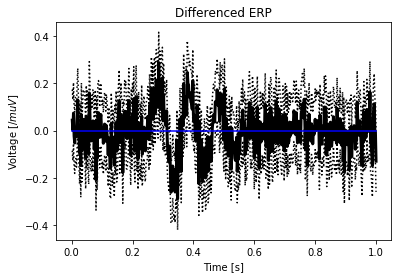

In [23]:
mnA = EEGa.mean(0)  # ERP of condition A
sdmnA = EEGa.std(0) / sqrt(ntrials)  

mnB = EEGb.mean(0)  # ERP of condition B
sdmnB = EEGb.std(0) / sqrt(ntrials)     

mnD = mnA - mnB     # Differenced ERP
sdmnD = sqrt(sdmnA ** 2 + sdmnB ** 2)   

plot(t, mnD, 'k', lw=3)         
plot(t, mnD + 2 * sdmnD, 'k:')  # upper CI
plot(t, mnD - 2 * sdmnD, 'k:')  # lower CI
plot([0, 1], [0, 0], 'b')       
xlabel('Time [s]')           
ylabel('Voltage [$/mu V$]') 
title('Differenced ERP')    
show()

## Confidence Intervals for the ERP (Method 2: bootstrap)

So far we have computed confidence intervals for the ERPs by relying on the central limit theorem and approximating the average voltage values at each point in time as normally distributed. An alternative approach to generate confidence intervals is through a **bootstrap** procedure. Bootstrapping is a resampling method that allows us to estimate the sampling distribution of many different statistics. In this notebook, we implement a *nonparametric bootstrap*. 

The advantage of the bootstrapping procedure over other approaches is that this procedure requires few assumptions about the distribution of the statistic of interest, and that we use the observed data to probe the distribution of the statistic. The disadvantage of the bootstrapping procedure is that it is computationally intensive.

  
**Nonparametric bootstrap.** The fundamental idea is that resampling the data with replacement is equivalent to sampling new pseudodata from the empirical cumulative distribution function (eCDF) of the observed data. For a large sample of independent, identically distributed random variables, the distribution of the pseudodata generated from the eCDF will be close to the true distribution of the data. Note the important caveat that the variables are independent, identically distributed; this assumption fails in many cases, such as for time series. Here, we assume that each trial is drawn independently from the same distribution (i.e., the trials are independent, identically distributed variables).

In [56]:
# Sample with replacement 1,000 trials of the EEG data from condition A
i = randint(0, ntrials, size=ntrials) # [0, 1000), minimum and maximum integers to draw

In [59]:
# Average these 1,000 trials to create a resampled ERP
ERP0 = EEG0.mean(0) 

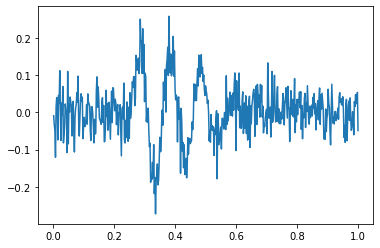

In [61]:
plot(t,ERP0)

In [24]:
# Repeat the previous two steps 3,000 times to create a distribution of ERPs.
def bootstrapERP(EEGdata, size=None):  
    """ Calculate bootstrap ERP from data (array type)"""
    ntrials = len(EEGdata)             
    if size == None:                  
        size = ntrials                 
    i = randint(ntrials, size=size)    
    EEG0 = EEGdata[i]                  
    return EEG0.mean(0)                
                                        
ERP0 = [bootstrapERP(EEGa) for _ in range(3000)]
ERP0 = array(ERP0)                    

Text(0.5, 1.0, 'ERP of condition A with bootstrap confidence intervals')

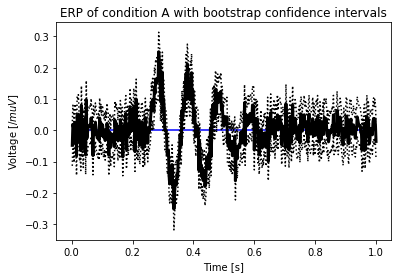

In [26]:
# For each time point, determine the values greater than 2.5% and less than 97.5% of all values

ERP0.sort(axis=0)         # Sort each column of the resampled ERP
N = len(ERP0)             
ciL = ERP0[int(0.025*N)]  # lower CI
ciU = ERP0[int(0.975*N)]  # upper CI
mnA = EEGa.mean(0)        
plot(t, mnA, 'k', lw=3)   
plot(t, ciL, 'k:')        
plot(t, ciU, 'k:')        
hlines(0, 0, 1, 'b')      
                          
xlabel('Time [s]')           
ylabel('Voltage [$/mu V$]') 
title('ERP of condition A with bootstrap confidence intervals')  